In [41]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from glob import glob
import json
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn import metrics
%matplotlib inline

In [2]:
img_paths = []
img_groups = []
coor_paths = []

sub_list = sorted([sub for sub in glob("../data/dataset/train/*/")])

for sub in sub_list:
    tmp_img_path = []
    tmp_json_path = []
    
    for img_path in glob(sub + '*.jpg'):
        tmp_img_path.append(img_path)
        img_groups.append(sub.split('/')[4])
    for coor_path in glob(sub + '*.json'):
        tmp_json_path.append(coor_path)
    img_paths += sorted(tmp_img_path)
    coor_paths += sorted(tmp_json_path)

---
## 오브젝트별 a의 평균을 
- 평균a와 평균w간의 상관관계를 본다. 

In [6]:
''' 주어진 a 의 평균값을 구한후  '''
lst_avg_area = []
lst_coor = []
FLAG_STOP= False


count = 0

for i,coor_path in enumerate(coor_paths):
    coor = json.load( open(coor_path, 'r'))['data']
    lst_coor_single = []
    lst_area = []
    
    for k,xy_pair in enumerate(coor):
        x = [ int(x) for x in xy_pair['x']] # int형으로 좌표 변환
        y = [ int(x) for x in xy_pair['y']]
        
        xy = np.column_stack((x,y))
        xy_contour = np.expand_dims(xy,1) # cv2 의 컨투어 포멧과 맞춰주기( 컨투어수, 1 , 좌표 )
        lst_coor_single.append(xy_contour)
        
        area = cv2.contourArea(xy_contour) # 크기 계산
        if area < 200:
            continue
        lst_area.append(area)
        
    avg_area = np.mean(lst_area)
    lst_avg_area.append(avg_area)
    lst_coor.append(lst_coor_single)

# 평균 a
df_a_temp  = pd.DataFrame()
df_a_temp['ImageDir'] = img_groups
df_a_temp['avg_area'] = lst_avg_area


df_a = df_a_temp.groupby('ImageDir').mean()

# 평균w
df_w = pd.read_csv('../data/dataset/train.csv')

# 합치고, 인덱스 설정
df_aw = pd.merge(df_a,df_w, how = 'left' , on = 'ImageDir')
df_aw.index = df_aw.ImageDir
df_aw = df_aw.drop(['ImageDir'],axis = 1)

df_aw_norm = (df_aw - df_aw.min())/(df_aw.max() - df_aw.min())

0.721883886949169 -1564.4328962080863


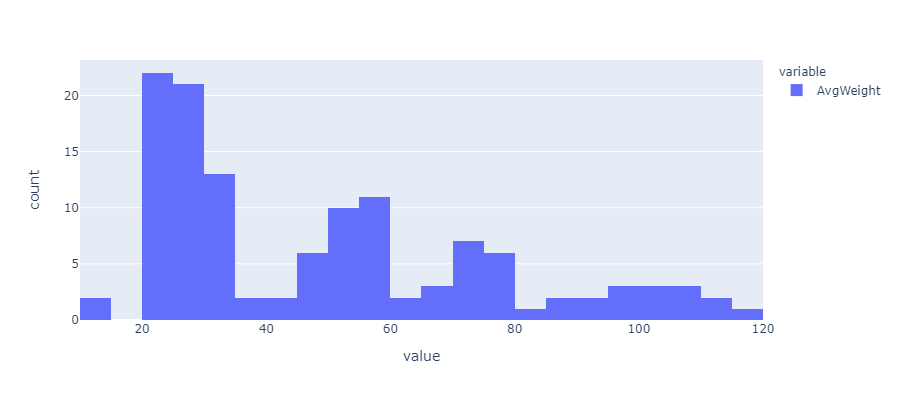

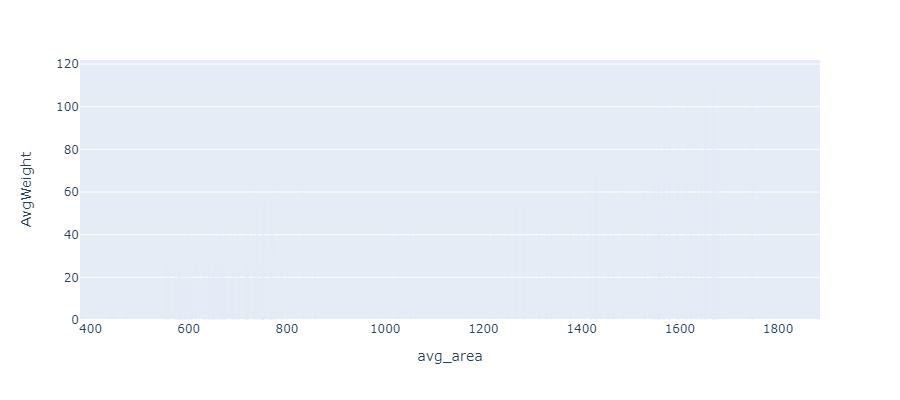

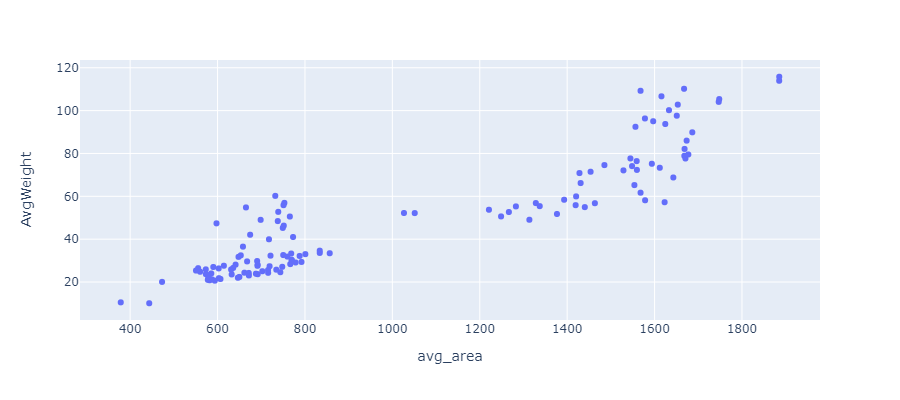

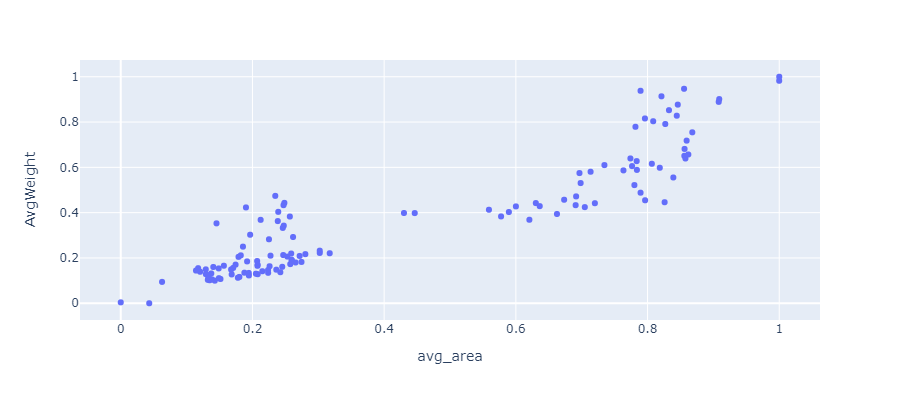

In [51]:
print(metrics.r2_score(df_aw_norm.AvgWeight,df_aw_norm.avg_area) , metrics.r2_score(df_aw.AvgWeight,df_aw.avg_area)  )

fig = px.histogram(df_aw['AvgWeight'] , width=800 , nbins= 40, height=400)
fig.show()

fig = px.bar(df_aw , x = 'avg_area', y = 'AvgWeight' , width=400 , height=400)
fig.show()

fig = px.scatter(df_aw , x = 'avg_area', y = 'AvgWeight' , width=400 , height=400)
fig.show()

fig = px.scatter(df_aw_norm , x = 'avg_area', y = 'AvgWeight', width=400 , height=400)
fig.show()

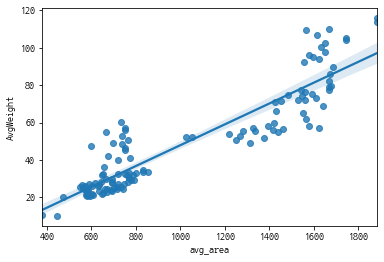

In [42]:
sns.regplot(x = 'avg_area', y = 'AvgWeight', data=df_aw);

---
## 영역을 제한하기 

In [ ]:
''' 주어진 a 의 평균값을 구한후  '''
lst_avg_area = []
lst_coor = []
FLAG_STOP= False


count = 0

for i,coor_path in enumerate(coor_paths):
    coor = json.load( open(coor_path, 'r'))['data']
    lst_coor_single = []
    lst_area = []
    
    for k,xy_pair in enumerate(coor):
        x = [ int(x) for x in xy_pair['x']] # int형으로 좌표 변환
        y = [ int(x) for x in xy_pair['y']]
        
        xy = np.column_stack((x,y))
        xy_contour = np.expand_dims(xy,1) # cv2 의 컨투어 포멧과 맞춰주기( 컨투어수, 1 , 좌표 )
        lst_coor_single.append(xy_contour)
        
        area = cv2.contourArea(xy_contour) # 크기 계산
        
        if area < 200 or area > 2000
        
        
        lst_area.append(area)
        
    avg_area = np.mean(lst_area)
    lst_avg_area.append(avg_area)
    lst_coor.append(lst_coor_single)

# 평균 a
df_a_temp  = pd.DataFrame()
df_a_temp['ImageDir'] = img_groups
df_a_temp['avg_area'] = lst_avg_area


df_a = df_a_temp.groupby('ImageDir').mean()

# 평균w
df_w = pd.read_csv('../data/dataset/train.csv')

# 합치고, 인덱스 설정
df_aw = pd.merge(df_a,df_w, how = 'left' , on = 'ImageDir')
df_aw.index = df_aw.ImageDir
df_aw = df_aw.drop(['ImageDir'],axis = 1)

df_aw_norm = (df_aw - df_aw.min())/(df_aw.max() - df_aw.min())

In [ ]:
print(metrics.r2_score(df_aw_norm.AvgWeight,df_aw_norm.avg_area) , metrics.r2_score(df_aw.AvgWeight,df_aw.avg_area)  )

fig = px.scatter(df_aw , x = 'avg_area', y = 'AvgWeight' , width=400 , height=400)
fig.show()

fig = px.scatter(df_aw_norm , x = 'avg_area', y = 'AvgWeight', width=400 , height=400)
fig.show()